<a href="https://colab.research.google.com/github/Mayank0512/All-Projects/blob/main/Classification_of_Cells_using_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
allfiles = glob.glob('/content/drive/MyDrive/Cell Type 1 /*.txt')

In [ ]:
with open("result.txt", "w") as outfile:
  for f in allfiles:
        with open(f, "r") as infile:
            outfile.write(infile.read())

In [ ]:
df_c1=pd.read_csv("result.txt",sep='\t')

In [ ]:
df_c1

,-9.59972934894235,-2.17036128044128
0,-6.358317,-1.337571
1,-3.118291,-0.310647
2,0.120348,3.992678
3,3.357602,5.456436
4,6.593472,3.879951
...,...,...
102394,2692.933860,0.142954
102395,2695.093362,-0.253381
102396,2697.252057,-0.170444
102397,2699.409948,0.151733


In [ ]:
allfiles_2 = glob.glob('/content/drive/MyDrive/Cell Type 3/*.txt')

In [ ]:
with open("result1.txt", "w") as outfile:
  for f in allfiles_2:
        with open(f, "r") as infile:
            outfile.write(infile.read())

In [ ]:
df_c3=pd.read_csv("result1.txt",sep='\t')

In [ ]:
df_c3

,-9.59972934894235,-0.506110846996307
0,-6.358317,-0.042236
1,-3.118291,0.944968
2,0.120348,1.716902
3,3.357602,1.947344
4,6.593472,1.819109
...,...,...
102394,2692.933860,0.032974
102395,2695.093362,0.147346
102396,2697.252057,0.042168
102397,2699.409948,-0.000728


In [ ]:
df_c3.loc[-1]=[-9.59972934894235,-2.17036128044128]
df_c3.index = df_c3.index + 1  
df_c3 = df_c3.sort_index() 

In [ ]:
all_dfs=[df_c1,df_c3]
for df in all_dfs:
    df.columns = ['X', 'Y']
df_merged=pd.concat(all_dfs).reset_index(drop=True)


In [ ]:
df_merged.loc[-1]=[-9.59972934894235,-2.17036128044128]
df_merged.index = df_merged.index + 1  
df_merged = df_merged.sort_index() 

In [ ]:
df_merged

,X,Y
0,-9.599729,-2.170361
1,-6.358317,-1.337571
2,-3.118291,-0.310647
3,0.120348,3.992678
4,3.357602,5.456436
...,...,...
204795,2692.933860,0.032974
204796,2695.093362,0.147346
204797,2697.252057,0.042168
204798,2699.409948,-0.000728


In [ ]:
X=df_merged.iloc[:,0]

In [ ]:
X=X.iloc[0:1024]

In [ ]:
X

0         -9.599729
1         -6.358317
2         -3.118291
3          0.120348
4          3.357602
           ...     
1019    2692.933860
1020    2695.093362
1021    2697.252057
1022    2699.409948
1023    2701.567033
Name: X, Length: 1024, dtype: float64

In [ ]:
Y=df_merged['Y'].values

In [ ]:
Y=Y.reshape(200,1024)

In [ ]:
Y

array([[-2.17036128e+00, -1.33757079e+00, -3.10646981e-01, ...,
         1.65100098e-01,  7.65251458e-01,  7.26086438e-01],
       [-1.75146246e+00, -1.53003168e+00,  2.72807628e-01, ...,
         4.76040035e-01,  5.95617652e-01,  3.57348621e-02],
       [-1.76389897e+00, -1.20642817e+00,  1.10273436e-01, ...,
        -3.73583995e-02,  4.02473152e-01,  8.27563480e-02],
       ...,
       [-5.59528828e-01, -3.43798816e-01,  1.07638669e+00, ...,
         3.14108878e-01,  3.52539048e-02,  8.25927705e-02],
       [-7.80903339e-01, -1.61376953e-01,  7.70742178e-01, ...,
         1.55356452e-01, -9.19677690e-03, -1.40527347e-02],
       [-6.00786150e-01, -4.24741209e-01,  9.92419422e-01, ...,
         4.21679690e-02, -7.27539067e-04, -1.86237797e-01]])

In [ ]:
from sklearn.preprocessing import StandardScaler
Y_scaled=StandardScaler().fit_transform(Y)
print(Y_scaled)
print('The shape of the feature matrix(normalised) is ',Y_scaled.shape)

[[-2.16022266 -1.5920328  -2.63179265 ... -0.26478885  0.82776201
   0.95931533]
 [-1.41122152 -2.02249535 -1.25513966 ...  0.6174541   0.47914861
  -0.64450979]
 [-1.43345829 -1.29871615 -1.63863681 ... -0.83923284  0.08221852
  -0.53526945]
 ...
 [ 0.71998441  0.63066088  0.6408939  ...  0.15800003 -0.67245153
  -0.53564947]
 [ 0.32416147  1.03866989 -0.08027005 ... -0.2924349  -0.76380186
  -0.76017636]
 [ 0.64621533  0.44962323  0.4427743  ... -0.61358934 -0.74639678
  -1.16019678]]
The shape of the feature matrix(normalised) is  (200, 1024)


In [ ]:
Y_scaled.T.shape

(1024, 200)

In [ ]:
Y_cov_matrix=np.cov(Y_scaled.T)

In [ ]:
Y_cov_matrix.shape

(1024, 1024)

In [ ]:
eig_vals,eig_vecs=np.linalg.eig(Y_cov_matrix)
print('Eigenvectors \n%s'%eig_vecs)
print('\nEigenvalues \n%s'%eig_vals)

Eigenvectors 
[[-0.04930785+0.j -0.02349963+0.j -0.0022234 +0.j ... -0.00721953+0.j
   0.01383633+0.j -0.01235596+0.j]
 [-0.04663478+0.j -0.0065589 +0.j -0.0071781 +0.j ...  0.00131858+0.j
   0.00013967+0.j  0.0002243 +0.j]
 [-0.04136643+0.j  0.02378668+0.j  0.01184175+0.j ...  0.00109119+0.j
  -0.00182833+0.j  0.00113978+0.j]
 ...
 [ 0.03235539+0.j -0.00143503+0.j  0.03981396+0.j ... -0.03539338+0.j
   0.00342308+0.j -0.00387161+0.j]
 [ 0.04252452+0.j -0.0056847 +0.j  0.05439798+0.j ... -0.01268024+0.j
  -0.02054021+0.j  0.01502061+0.j]
 [ 0.03960174+0.j -0.02382286+0.j  0.06235752+0.j ...  0.00367506+0.j
   0.01092705+0.j -0.00773389+0.j]]

Eigenvalues 
[3.32341441e+02+0.j 4.68491700e+01+0.j 3.96936753e+01+0.j ...
 3.71765257e-16+0.j 3.18226893e-16+0.j 3.34237141e-16+0.j]


In [ ]:
eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[:,i])for i in range (len(eig_vals))]

In [ ]:
eig_pairs.sort(key=lambda x:x[0],reverse=True)


In [ ]:
tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print(40*"-")
print("Cummulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [(32.29294273970155+0j), (4.55223869127794+0j), (3.856953799018703+0j), (2.6664206415144784+0j), (2.6318131142320342+0j), (2.2499056551836865+0j), (2.227071322877679+0j), (1.729927291542237+0j), (1.542756500321399+0j), (1.337396478610155+0j), (1.211326520980209+0j), (1.1953222434324389+0j), (1.161083385389898+0j), (1.0841505066216637+0j), (1.0141188282790476+0j), (0.9776699419557613+0j), (0.9473056706111862+0j), (0.892933160625459+0j), (0.8252739676323189+0j), (0.797870235414223+0j), (0.7870228234607961+0j), (0.7591015363323717+0j), (0.7233148217536538+0j), (0.7076254521363134+0j), (0.688701175631064+0j), (0.6799611544905895+0j), (0.6574554716404196+0j), (0.6351337507519126+0j), (0.6142799889121533+0j), (0.5941918280601229+0j), (0.5738657594753326+0j), (0.5654963298187458+0j), (0.5614254318125643+0j), (0.5426418211810469+0j), (0.5340732407402896+0j), (0.5279297761563384+0j), (0.5078118404888126+0j), (0.4994055523589774+0j), (0.48390023243252434+

In [ ]:
print("The first four eigen pairs in descending order are:-")
print("")
for i in range(0,4):
  print(eig_pairs[i])
  print("")

The first four eigen pairs in descending order are:-

(332.34144085883844, array([-0.04930785+0.j, -0.04663478+0.j, -0.04136643+0.j, ...,
        0.03235539+0.j,  0.04252452+0.j,  0.03960174+0.j]))

(46.84917004893081, array([-0.02349963+0.j, -0.0065589 +0.j,  0.02378668+0.j, ...,
       -0.00143503+0.j, -0.0056847 +0.j, -0.02382286+0.j]))

(39.69367527834328, array([-0.0022234 +0.j, -0.0071781 +0.j,  0.01184175+0.j, ...,
        0.03981396+0.j,  0.05439798+0.j,  0.06235752+0.j]))

(27.44135413980732, array([-0.01364939+0.j,  0.01589429+0.j,  0.02893048+0.j, ...,
        0.02881385+0.j,  0.0106997 +0.j,  0.0479838 +0.j]))



In [ ]:
print("All Eigen Values along with Eigen Vectors")
pprint.pprint(eig_pairs)
print(40*'-')
matrix_w_1=np.hstack((eig_pairs[0][1].reshape(1024,1),
                     eig_pairs[1][1].reshape(1024,1)))

All Eigen Values along with Eigen Vectors
[(332.34144085883844,
  array([-0.04930785+0.j, -0.04663478+0.j, -0.04136643+0.j, ...,
        0.03235539+0.j,  0.04252452+0.j,  0.03960174+0.j])),
 (46.84917004893081,
  array([-0.02349963+0.j, -0.0065589 +0.j,  0.02378668+0.j, ...,
       -0.00143503+0.j, -0.0056847 +0.j, -0.02382286+0.j])),
 (39.69367527834328,
  array([-0.0022234 +0.j, -0.0071781 +0.j,  0.01184175+0.j, ...,
        0.03981396+0.j,  0.05439798+0.j,  0.06235752+0.j])),
 (27.44135413980732,
  array([-0.01364939+0.j,  0.01589429+0.j,  0.02893048+0.j, ...,
        0.02881385+0.j,  0.0106997 +0.j,  0.0479838 +0.j])),
 (27.08519225099101,
  array([ 0.00862141+0.j,  0.01692807+0.j,  0.02403737+0.j, ...,
        0.05410366+0.j,  0.01788606+0.j, -0.01242943+0.j])),
 (23.1548079488251,
  array([ 0.00387934+0.j,  0.00458519+0.j, -0.01221772+0.j, ...,
        0.01217114+0.j, -0.02443428+0.j,  0.01335662+0.j])),
 (22.91980939323362,
  array([-0.00730862+0.j,  0.00470049+0.j, -0.00603669+

In [ ]:
matrix_w_1.shape

(1024, 2)

In [ ]:
Y_scaled.shape

(200, 1024)

In [ ]:
dot=np.dot(Y_scaled,matrix_w_1)

In [ ]:
dot.shape

(200, 2)

In [ ]:
principalDf=pd.DataFrame(data=dot,columns=['principal component 1','principal component 2']) 

In [ ]:
principalDf_100=principalDf[0:100]

In [ ]:
principalDf_100=principalDf_100.assign(target='Class 1')

In [ ]:
principalDf_next100=principalDf[100:200]

In [ ]:
principalDf_next100=principalDf_next100.assign(target='Class 2')

In [ ]:
principalDf_next100

,principal component 1,principal component 2,target
100,-11.216158+0.000000j,-11.710409+0.000000j,Class 2
101,-11.954880+0.000000j,-11.792858+0.000000j,Class 2
102,-10.076516+0.000000j,-32.471313+0.000000j,Class 2
103,-11.465069+0.000000j,-21.398996+0.000000j,Class 2
104,-9.740235+0.000000j,-15.863409+0.000000j,Class 2
...,...,...,...
195,-15.369474+0.000000j,-6.572133+0.000000j,Class 2
196,-14.546621+0.000000j,-2.961069+0.000000j,Class 2
197,-15.712778+0.000000j,-5.906441+0.000000j,Class 2
198,-14.818183+0.000000j,-2.092595+0.000000j,Class 2


In [ ]:
all_dfs_principal=[principalDf_100,principalDf_next100]
for df_principle in all_dfs_principal:
    df_principle.columns = ['Prinicipal Component 1', 'Principal Component 2','Target']
df_merged_principle=pd.concat(all_dfs_principal).reset_index(drop=True)

In [ ]:
df_merged_principle

,Prinicipal Component 1,Principal Component 2,Target
0,22.342238+0.000000j,2.545088+0.000000j,Class 1
1,44.590152+0.000000j,-1.346835+0.000000j,Class 1
2,19.352447+0.000000j,10.590820+0.000000j,Class 1
3,11.467712+0.000000j,2.618096+0.000000j,Class 1
4,4.955854+0.000000j,5.333191+0.000000j,Class 1
...,...,...,...
195,-15.369474+0.000000j,-6.572133+0.000000j,Class 2
196,-14.546621+0.000000j,-2.961069+0.000000j,Class 2
197,-15.712778+0.000000j,-5.906441+0.000000j,Class 2
198,-14.818183+0.000000j,-2.092595+0.000000j,Class 2


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning:

Casting complex values to real discards the imaginary part



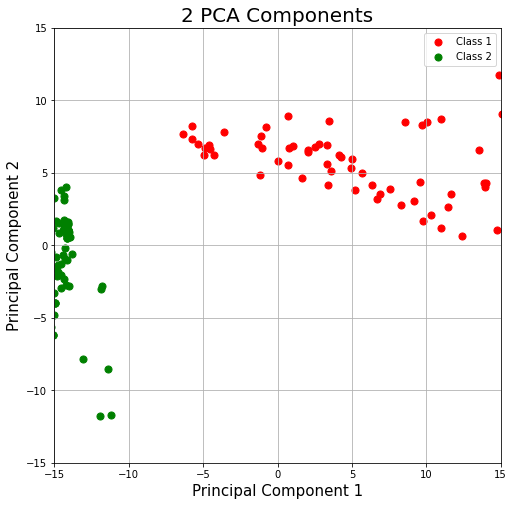

In [ ]:
fig=plt.figure(figsize=(8,8))  
ax=fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1',fontsize = 15)  
ax.set_ylabel('Principal Component 2',fontsize = 15)  
ax.set_title('2 PCA Components',fontsize=20)  
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)
targets=['Class 1','Class 2'] 
colors=['r','g']  
for target,color in zip(targets,colors):    
     indicesToKeep = df_merged_principle['Target'] == target  
     ax.scatter(df_merged_principle.loc[indicesToKeep,'Prinicipal Component 1'],
              df_merged_principle.loc[indicesToKeep,'Principal Component 2'],
             c=color,
             s=50)
ax.legend(targets)  
ax.grid()

In [ ]:
matrix_w_2=np.hstack((eig_pairs[0][1].reshape(1024,1),
                     eig_pairs[1][1].reshape(1024,1),
                      eig_pairs[2][1].reshape(1024,1)))

In [ ]:
matrix_w_2.shape

(1024, 3)

In [ ]:
dot_1=np.dot(Y_scaled,matrix_w_2)

In [ ]:
dot_1.shape

(200, 3)

In [ ]:
principalDf_3=pd.DataFrame(data=dot_1,columns=['principal component 1','principal component 2','principal component 3']) 

In [ ]:
principalDf_3

,principal component 1,principal component 2,principal component 3
0,22.342238+0.000000j,2.545088+0.000000j,-3.685493+0.000000j
1,44.590152+0.000000j,-1.346835+0.000000j,-20.829993+0.000000j
2,19.352447+0.000000j,10.590820+0.000000j,-18.517664+0.000000j
3,11.467712+0.000000j,2.618096+0.000000j,1.991194+0.000000j
4,4.955854+0.000000j,5.333191+0.000000j,1.539780+0.000000j
...,...,...,...
195,-15.369474+0.000000j,-6.572133+0.000000j,-4.806612+0.000000j
196,-14.546621+0.000000j,-2.961069+0.000000j,-1.204152+0.000000j
197,-15.712778+0.000000j,-5.906441+0.000000j,-3.021804+0.000000j
198,-14.818183+0.000000j,-2.092595+0.000000j,-1.057746+0.000000j


In [ ]:
principalDf3_100=principalDf_3[0:100]
principalDf3_100=principalDf3_100.assign(target='Class 1')
principalDf3_next100=principalDf_3[100:200]
principalDf3_next100=principalDf3_next100.assign(target='Class 2')

In [ ]:
principalDf3_next100

,principal component 1,principal component 2,principal component 3,target
100,-11.216158+0.000000j,-11.710409+0.000000j,-5.201733+0.000000j,Class 2
101,-11.954880+0.000000j,-11.792858+0.000000j,-5.724165+0.000000j,Class 2
102,-10.076516+0.000000j,-32.471313+0.000000j,-16.713853+0.000000j,Class 2
103,-11.465069+0.000000j,-21.398996+0.000000j,-9.531014+0.000000j,Class 2
104,-9.740235+0.000000j,-15.863409+0.000000j,-6.206525+0.000000j,Class 2
...,...,...,...,...
195,-15.369474+0.000000j,-6.572133+0.000000j,-4.806612+0.000000j,Class 2
196,-14.546621+0.000000j,-2.961069+0.000000j,-1.204152+0.000000j,Class 2
197,-15.712778+0.000000j,-5.906441+0.000000j,-3.021804+0.000000j,Class 2
198,-14.818183+0.000000j,-2.092595+0.000000j,-1.057746+0.000000j,Class 2


In [ ]:
all_dfs_principal_3=[principalDf3_100,principalDf3_next100]
for df_principle in all_dfs_principal_3:
    df_principle.columns = ['Prinicipal Component 1', 'Principal Component 2','Principal Component 3','Target']
df_merged_principle_3=pd.concat(all_dfs_principal_3).reset_index(drop=True)

In [ ]:
df_merged_principle_3

,Prinicipal Component 1,Principal Component 2,Principal Component 3,Target
0,22.342238+0.000000j,2.545088+0.000000j,-3.685493+0.000000j,Class 1
1,44.590152+0.000000j,-1.346835+0.000000j,-20.829993+0.000000j,Class 1
2,19.352447+0.000000j,10.590820+0.000000j,-18.517664+0.000000j,Class 1
3,11.467712+0.000000j,2.618096+0.000000j,1.991194+0.000000j,Class 1
4,4.955854+0.000000j,5.333191+0.000000j,1.539780+0.000000j,Class 1
...,...,...,...,...
195,-15.369474+0.000000j,-6.572133+0.000000j,-4.806612+0.000000j,Class 2
196,-14.546621+0.000000j,-2.961069+0.000000j,-1.204152+0.000000j,Class 2
197,-15.712778+0.000000j,-5.906441+0.000000j,-3.021804+0.000000j,Class 2
198,-14.818183+0.000000j,-2.092595+0.000000j,-1.057746+0.000000j,Class 2


In [ ]:
final_1=df_merged_principle_3['Prinicipal Component 1'].values.real
final_2=df_merged_principle_3['Principal Component 2'].values.real
final_3=df_merged_principle_3['Principal Component 3'].values.real

In [ ]:
df_merged_principle_3['Target']

0      Class 1
1      Class 1
2      Class 1
3      Class 1
4      Class 1
        ...   
195    Class 2
196    Class 2
197    Class 2
198    Class 2
199    Class 2
Name: Target, Length: 200, dtype: object

In [ ]:
df_dummy=pd.get_dummies(df_merged_principle_3['Target'])

In [ ]:
from mpl_toolkits import mplot3d

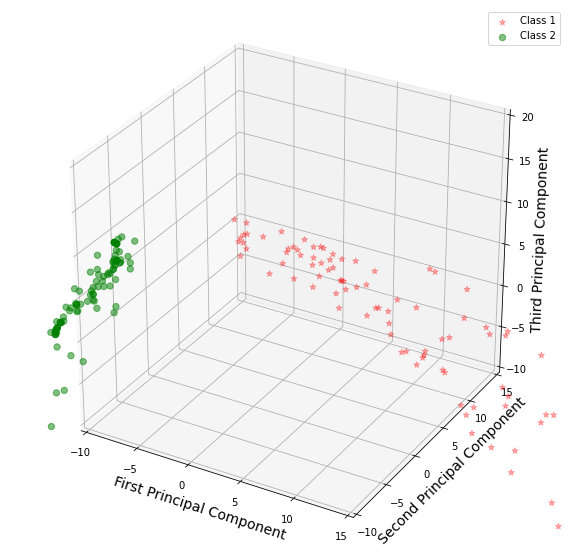

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

y=df_merged_principle_3['Target']

cdict = {'Class 1':'red','Class 2':'green'}
labl = {'Class 1':'Class 1','Class 2':'Class 2'}
marker = {'Class 1':'*','Class 2':'o'}
alpha = {'Class 1':.3, 'Class 2':.5}

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(final_1[ix], final_2[ix], final_3[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlim3d(-10,15)
ax.set_ylim3d(-10,15)
ax.set_zlim3d(-10,20)
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)
ax.legend()
plt.show()